In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = '16'
plt.rcParams['ytick.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['axes.titlesize'] = '18'

QB = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_QB.csv', 
                 names=['RANK', 'Player','PASS_CMP', 'PASS_ATT', 'PCT','PASS_YDS', 'PASS_Y/A', 'PASS_TD', 'PASS_INT', 'SACKS', 'RUSH_ATT', 'RUSH_YDS', 'RUSH_TD',
                          'FL', 'G', 'FPTS', 'FPTS/G', 'ROST'], skiprows=1, index_col=False, thousands=',')
RB = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_RB.csv',
                 names=['RANK', 'Player','RUSH_ATT', 'RUSH_YDS', 'RUSH_Y/A', 'RUSH_LG', 'RUSH_20+', 'RUSH_TD', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R',
                        'REC_TD', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST'], skiprows=1, index_col=False, thousands=',')
WR = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_WR.csv',
                 names=['RANK', 'Player', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R', 'REC_LG', 'REC_20+', 'REC_TD', 'RUSH_ATT', 'RUSH_YDS', 'RUSH_TD', 'FL', 
                        'G', 'FPTS', 'FPTS/G', 'ROST'],
                 skiprows=1, index_col=False, thousands=',')
TE = pd.read_csv('FantasyPros_Fantasy_Football_Statistics_TE.csv',
                 names=['RANK', 'Player', 'REC', 'TGT', 'REC_YDS', 'REC_Y/R', 'REC_LG', 'REC_20+', 'REC_TD', 'RUSH_ATT', 'RUSH_YDS','RUSH_TD', 'FL', 
                        'G', 'FPTS', 'FPTS/G', 'ROST'],
                 skiprows=1, index_col=False, thousands=',')

# More NFL statistics

Last session, we played around with visualizing data of the heights of NFL players. Today, we're going to extend that further by practicing manipulating datasets full of information about player statistics. We're going to learn how to "slice and dice" pandas Data Frames to get the information that we want so that we can glean information from these sets of data.

To start, let's take a look at what's contained in one of these dataframes, starting with the quarterbacks.

In [96]:
QB

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Josh Allen (BUF),385.0,579.0,66.5,4306.0,7.4,29.0,18.0,24.0,111.0,524.0,15.0,4.0,17.0,410.9,24.2,99.9%
1,2.0,Jalen Hurts (PHI),352.0,538.0,65.4,3858.0,7.2,23.0,15.0,36.0,157.0,605.0,15.0,5.0,17.0,371.9,21.9,99.9%
2,3.0,Dak Prescott (DAL),410.0,590.0,69.5,4516.0,7.7,36.0,9.0,39.0,55.0,242.0,2.0,2.0,17.0,352.0,20.7,96.3%
3,4.0,Lamar Jackson (BAL),307.0,457.0,67.2,3678.0,8.0,24.0,7.0,37.0,148.0,821.0,5.0,6.0,16.0,338.2,21.1,99.3%
4,5.0,Jordan Love (GB),372.0,579.0,64.2,4159.0,7.2,32.0,11.0,30.0,50.0,247.0,4.0,3.0,17.0,330.1,19.4,86.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Barkley (JAC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,0.0,1.0,-0.3,-0.3,0.0%
143,144.0,Nathan Peterman (NO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-4.0,0.0,0.0,2.0,-0.4,-0.2,0.0%
144,145.0,Kyle Allen (PIT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,-13.0,0.0,0.0,7.0,-1.3,-0.2,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Just like last time, let's start by exploring the data set. There are 147 different rows in this data. We can pick a single statistic like "PASS_YDS", pring the range, and plot a histogram, to see what that distribution looks like. To access a value in a dataframe, we use the syntax: df['VARIABLE_NAME'], like so:

In [119]:
QB['PASS_YDS']

0      4306.0
1      3858.0
2      4516.0
3      3678.0
4      4159.0
        ...  
142       0.0
143       0.0
144       0.0
145       NaN
146       NaN
Name: PASS_YDS, Length: 147, dtype: float64

Below, let's print the minimum and maximum of that passing yards statistic and take a look at the distribution:

Minimum Passing Yards: 0.0
Maximum Passing Yards: 4624.0


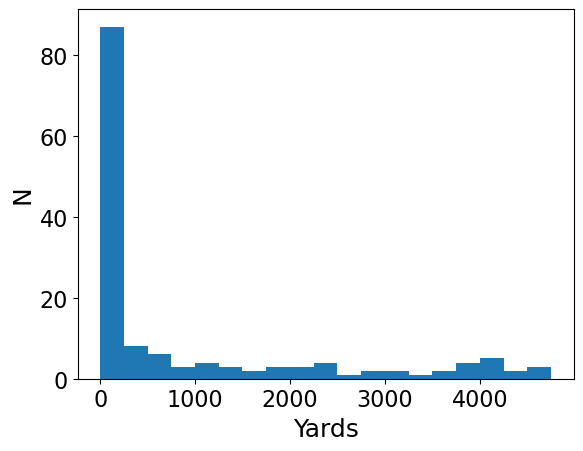

In [97]:
print('Minimum Passing Yards:', np.min(QB['PASS_YDS']))
print('Maximum Passing Yards:', np.max(QB['PASS_YDS']))

bins = np.arange(np.min(QB['PASS_YDS']), np.max(QB['PASS_YDS'])+251, 250)

plt.hist(QB['PASS_YDS'], bins=bins)
plt.xlabel('Yards')
plt.ylabel('N')
plt.show()

What's the first thing that we notice about this dataset? 

# .query(): the most powerful pandas tool

When working with big data sets, there's often lots of "junk" in there that you want to remove. In a galaxies context, these could be real galaxies that are too faint for you to trust any of the measurements that you're making. In the case of the NFL, this is usually lots of players who are on rosters, but who don't really play! To get some intuition for this, let's take the same QB dataset and look at the number of passes that the players threw.

Minimum Passing Attempts: 0.0
Maximum Passing Attempts: 612.0


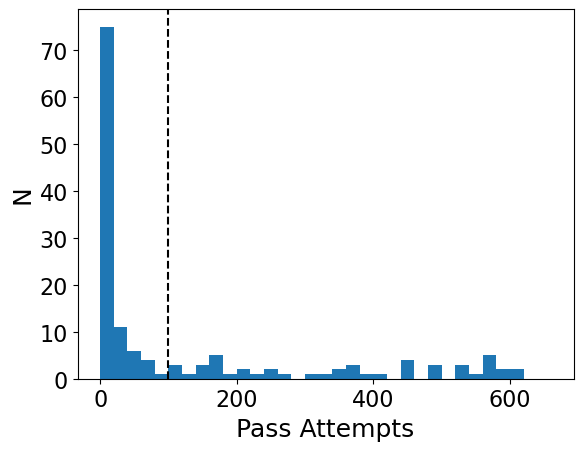

In [98]:
print('Minimum Passing Attempts:', np.min(QB['PASS_ATT']))
print('Maximum Passing Attempts:', np.max(QB['PASS_ATT']))

bins = np.arange(np.min(QB['PASS_ATT']), np.max(QB['PASS_ATT'])+50, 20)

plt.hist(QB['PASS_ATT'], bins=bins)
plt.axvline(100, ls='--', color='black')
plt.xlabel('Pass Attempts')
plt.ylabel('N')
plt.show()

It's really common to "clean" data before presenting any analysis. However, when you do this, it's really important to be transparent with what you're doing! It's totally fine to remove some data points with good justification, but you need to a) make it clear exactly what you did so that the steps are reproducible and b) justify why you made the choices that you did.

In our case, we're going to remove all players who threw it less than 100 times to try to only keep players who actually saw the field a decent amount. We're going to do this with the .query() function. We provide .query() with a string that tells it what operations we'd like to do on a column of our dataframe. In this case, we're going to try 'PASS_ATT>100'. First, let's look again at the full dataset:

In [99]:
QB

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Josh Allen (BUF),385.0,579.0,66.5,4306.0,7.4,29.0,18.0,24.0,111.0,524.0,15.0,4.0,17.0,410.9,24.2,99.9%
1,2.0,Jalen Hurts (PHI),352.0,538.0,65.4,3858.0,7.2,23.0,15.0,36.0,157.0,605.0,15.0,5.0,17.0,371.9,21.9,99.9%
2,3.0,Dak Prescott (DAL),410.0,590.0,69.5,4516.0,7.7,36.0,9.0,39.0,55.0,242.0,2.0,2.0,17.0,352.0,20.7,96.3%
3,4.0,Lamar Jackson (BAL),307.0,457.0,67.2,3678.0,8.0,24.0,7.0,37.0,148.0,821.0,5.0,6.0,16.0,338.2,21.1,99.3%
4,5.0,Jordan Love (GB),372.0,579.0,64.2,4159.0,7.2,32.0,11.0,30.0,50.0,247.0,4.0,3.0,17.0,330.1,19.4,86.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Barkley (JAC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,0.0,1.0,-0.3,-0.3,0.0%
143,144.0,Nathan Peterman (NO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-4.0,0.0,0.0,2.0,-0.4,-0.2,0.0%
144,145.0,Kyle Allen (PIT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,-13.0,0.0,0.0,7.0,-1.3,-0.2,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And now let's look at what happens when we do that cut:

In [100]:
QB.query('PASS_ATT>100')

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Josh Allen (BUF),385.0,579.0,66.5,4306.0,7.4,29.0,18.0,24.0,111.0,524.0,15.0,4.0,17.0,410.9,24.2,99.9%
1,2.0,Jalen Hurts (PHI),352.0,538.0,65.4,3858.0,7.2,23.0,15.0,36.0,157.0,605.0,15.0,5.0,17.0,371.9,21.9,99.9%
2,3.0,Dak Prescott (DAL),410.0,590.0,69.5,4516.0,7.7,36.0,9.0,39.0,55.0,242.0,2.0,2.0,17.0,352.0,20.7,96.3%
3,4.0,Lamar Jackson (BAL),307.0,457.0,67.2,3678.0,8.0,24.0,7.0,37.0,148.0,821.0,5.0,6.0,16.0,338.2,21.1,99.3%
4,5.0,Jordan Love (GB),372.0,579.0,64.2,4159.0,7.2,32.0,11.0,30.0,50.0,247.0,4.0,3.0,17.0,330.1,19.4,86.0%
5,6.0,Brock Purdy (SF),308.0,444.0,69.4,4280.0,9.6,31.0,11.0,28.0,39.0,144.0,2.0,2.0,16.0,306.6,19.2,92.4%
6,7.0,Jared Goff (DET),407.0,605.0,67.3,4575.0,7.6,30.0,12.0,30.0,32.0,21.0,2.0,3.0,17.0,302.9,17.8,70.7%
7,8.0,Patrick Mahomes II (KC),401.0,597.0,67.2,4183.0,7.0,27.0,14.0,27.0,75.0,389.0,0.0,3.0,16.0,294.1,18.4,99.3%
8,9.0,Tua Tagovailoa (MIA),388.0,560.0,69.3,4624.0,8.3,29.0,14.0,29.0,35.0,74.0,0.0,5.0,17.0,284.4,16.7,80.5%
9,10.0,Baker Mayfield (TB),364.0,566.0,64.3,4044.0,7.1,28.0,10.0,40.0,62.0,163.0,1.0,3.0,17.0,284.0,16.7,43.6%


You can see that this brought the dataset down significantly--we now only have 54 players from our original 147. One of the coolest things about .query() operations is that you can chain them together. Let's say we want to get a database that is "all players who threw it more than 100 times and who completed >65% of their passes." We can do that by querying twice, once for the passing attempts and once for the completion percentage, like so:

In [103]:
QB.query('PASS_ATT>100').query('PCT>65')

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Josh Allen (BUF),385.0,579.0,66.5,4306.0,7.4,29.0,18.0,24.0,111.0,524.0,15.0,4.0,17.0,410.9,24.2,99.9%
1,2.0,Jalen Hurts (PHI),352.0,538.0,65.4,3858.0,7.2,23.0,15.0,36.0,157.0,605.0,15.0,5.0,17.0,371.9,21.9,99.9%
2,3.0,Dak Prescott (DAL),410.0,590.0,69.5,4516.0,7.7,36.0,9.0,39.0,55.0,242.0,2.0,2.0,17.0,352.0,20.7,96.3%
3,4.0,Lamar Jackson (BAL),307.0,457.0,67.2,3678.0,8.0,24.0,7.0,37.0,148.0,821.0,5.0,6.0,16.0,338.2,21.1,99.3%
5,6.0,Brock Purdy (SF),308.0,444.0,69.4,4280.0,9.6,31.0,11.0,28.0,39.0,144.0,2.0,2.0,16.0,306.6,19.2,92.4%
6,7.0,Jared Goff (DET),407.0,605.0,67.3,4575.0,7.6,30.0,12.0,30.0,32.0,21.0,2.0,3.0,17.0,302.9,17.8,70.7%
7,8.0,Patrick Mahomes II (KC),401.0,597.0,67.2,4183.0,7.0,27.0,14.0,27.0,75.0,389.0,0.0,3.0,16.0,294.1,18.4,99.3%
8,9.0,Tua Tagovailoa (MIA),388.0,560.0,69.3,4624.0,8.3,29.0,14.0,29.0,35.0,74.0,0.0,5.0,17.0,284.4,16.7,80.5%
12,13.0,Trevor Lawrence (JAC),370.0,564.0,65.6,4016.0,7.1,21.0,14.0,35.0,70.0,339.0,4.0,7.0,16.0,276.6,17.3,72.7%
13,14.0,Russell Wilson (PIT),297.0,447.0,66.4,3070.0,6.9,26.0,8.0,45.0,80.0,341.0,3.0,5.0,15.0,264.9,17.7,31.0%


One other extremely powerful pandas operation is the "sort_values" function. Right now, the dataframe is ordered by "RANK" (which I think is just what a bunch of guys on the website I pulled the data from decided to rank the quarterbacks for fantasy football), but let's say we instead want to look at all the players ranked in order of their completion percentage. We can do this by running .sort_values('PCT', ascending=False). We need to do "ascending=False", because otherwise, it will go from lowest to highest, which isn't very helpful for us. Let's take a look at the first 20 players; we can do this by slicing the data with a command that looks like this [:20]. Here, the : means "grab every point until" and "20" is the stopping point.

In [116]:
QB.sort_values('PCT', ascending=False)[:20]

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
72,73.0,Sean Clifford (GB),1.0,1.0,100.0,37.0,37.0,0.0,0.0,0.0,3.0,-2.0,0.0,0.0,2.0,1.3,0.7,0.2%
71,72.0,Mike White (MIA),5.0,6.0,83.3,74.0,12.3,1.0,1.0,0.0,8.0,-9.0,0.0,1.0,6.0,3.1,0.5,0.2%
73,74.0,AJ McCarron (FA),4.0,5.0,80.0,19.0,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.8,0.4,0.0%
69,70.0,Malik Willis (TEN),4.0,5.0,80.0,74.0,14.8,0.0,0.0,4.0,5.0,21.0,0.0,1.0,3.0,3.1,1.0,0.1%
56,57.0,Jacoby Brissett (NE),18.0,23.0,78.3,224.0,9.7,3.0,0.0,0.0,3.0,19.0,0.0,0.0,3.0,22.9,7.6,1.3%
57,58.0,C.J. Beathard (JAC),40.0,53.0,75.5,349.0,6.6,1.0,0.0,6.0,8.0,35.0,0.0,0.0,8.0,21.5,2.7,0.6%
68,69.0,Cooper Rush (DAL),18.0,24.0,75.0,144.0,6.0,0.0,1.0,1.0,12.0,-5.0,0.0,0.0,8.0,4.2,0.5,0.2%
74,75.0,Logan Woodside (CIN),3.0,4.0,75.0,27.0,6.8,0.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,0.7,0.7,0.0%
46,47.0,Mason Rudolph (TEN),55.0,74.0,74.3,719.0,9.7,3.0,0.0,6.0,10.0,8.0,0.0,1.0,4.0,39.6,9.9,1.6%
50,51.0,Carson Wentz (KC),17.0,24.0,70.8,163.0,6.8,2.0,1.0,2.0,17.0,56.0,1.0,0.0,2.0,27.1,13.6,0.7%


Again, we can wee lots of "junk" in the database! Sean Clifford only threw 1 pass, so I don't know how meaningful it is that he completed that one pass. The nice thing here is that, just like we can chain together .query() calls, we can also chain a .sort_values() call to a .query() call to only look at completion percentage for the guys who threw at least 100 times:

In [109]:
QB.query('PASS_ATT>100').sort_values('PCT', ascending=False)[:20]

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
26,27.0,Jake Browning (CIN),171.0,243.0,70.4,1936.0,8.0,12.0,7.0,24.0,27.0,127.0,3.0,0.0,9.0,150.5,16.7,20.8%
2,3.0,Dak Prescott (DAL),410.0,590.0,69.5,4516.0,7.7,36.0,9.0,39.0,55.0,242.0,2.0,2.0,17.0,352.0,20.7,96.3%
23,24.0,Kirk Cousins (ATL),216.0,311.0,69.5,2331.0,7.5,18.0,5.0,17.0,14.0,25.0,0.0,4.0,8.0,154.9,19.4,41.8%
5,6.0,Brock Purdy (SF),308.0,444.0,69.4,4280.0,9.6,31.0,11.0,28.0,39.0,144.0,2.0,2.0,16.0,306.6,19.2,92.4%
8,9.0,Tua Tagovailoa (MIA),388.0,560.0,69.3,4624.0,8.3,29.0,14.0,29.0,35.0,74.0,0.0,5.0,17.0,284.4,16.7,80.5%
15,16.0,Derek Carr (NO),375.0,548.0,68.4,3878.0,7.1,25.0,8.0,31.0,32.0,40.0,0.0,3.0,17.0,249.1,14.7,25.2%
38,39.0,Nick Mullens (MIN),100.0,148.0,67.6,1306.0,8.8,7.0,8.0,12.0,10.0,25.0,0.0,0.0,5.0,74.6,14.9,4.1%
43,44.0,Daniel Jones (NYG),108.0,160.0,67.5,909.0,5.7,2.0,6.0,30.0,40.0,206.0,1.0,1.0,6.0,63.0,10.5,10.8%
6,7.0,Jared Goff (DET),407.0,605.0,67.3,4575.0,7.6,30.0,12.0,30.0,32.0,21.0,2.0,3.0,17.0,302.9,17.8,70.7%
3,4.0,Lamar Jackson (BAL),307.0,457.0,67.2,3678.0,8.0,24.0,7.0,37.0,148.0,821.0,5.0,6.0,16.0,338.2,21.1,99.3%


For those slices, we can also grab any arbitrary set of the data. Let's take a look at the 20th-40th best players by completion percentage below by slicing "[20:40]"

In [117]:
QB.query('PASS_ATT>100').sort_values('PCT', ascending=False)[20:40]

,RANK,Player,PASS_CMP,PASS_ATT,PCT,PASS_YDS,PASS_Y/A,PASS_TD,PASS_INT,SACKS,RUSH_ATT,RUSH_YDS,RUSH_TD,FL,G,FPTS,FPTS/G,ROST
29,30.0,Mac Jones (JAC),224.0,345.0,64.9,2120.0,6.1,10.0,12.0,22.0,26.0,96.0,0.0,2.0,11.0,118.3,10.8,2.3%
36,37.0,Ryan Tannehill (FA),149.0,230.0,64.8,1616.0,7.0,4.0,7.0,32.0,17.0,74.0,1.0,0.0,9.0,87.0,9.7,1.1%
18,19.0,Geno Smith (SEA),323.0,499.0,64.7,3624.0,7.3,20.0,9.0,31.0,37.0,155.0,1.0,3.0,15.0,235.4,15.7,38.7%
35,36.0,Tyrod Taylor (NYJ),116.0,180.0,64.4,1341.0,7.5,5.0,3.0,17.0,38.0,197.0,0.0,0.0,11.0,90.3,8.2,2.7%
9,10.0,Baker Mayfield (TB),364.0,566.0,64.3,4044.0,7.1,28.0,10.0,40.0,62.0,163.0,1.0,3.0,17.0,284.0,16.7,43.6%
4,5.0,Jordan Love (GB),372.0,579.0,64.2,4159.0,7.2,32.0,11.0,30.0,50.0,247.0,4.0,3.0,17.0,330.1,19.4,86.0%
21,22.0,Desmond Ridder (ARI),249.0,388.0,64.2,2836.0,7.3,12.0,12.0,31.0,53.0,193.0,5.0,7.0,15.0,188.1,12.5,3.7%
33,34.0,Tommy DeVito (NYG),114.0,178.0,64.0,1101.0,6.2,8.0,3.0,37.0,36.0,195.0,1.0,1.0,10.0,96.5,9.7,3.1%
10,11.0,C.J. Stroud (HOU),319.0,499.0,63.9,4108.0,8.2,23.0,5.0,38.0,39.0,167.0,3.0,4.0,15.0,280.1,18.7,92.8%
42,43.0,Easton Stick (LAC),111.0,174.0,63.8,1129.0,6.5,3.0,1.0,14.0,27.0,144.0,1.0,4.0,5.0,68.1,13.6,1.6%


# Activity: Pick a statistic that you're interested in and find out who the top 10 players are for that stat

Try checking that stat for both with and without the requirement that the QB has thrown it 100 times

# Creating new columns by combining data

Sometimes, we need to use existing columns in our datasets to create new combinations of data. This functionality is really easy within pandas--we can do any number of operations between existing columns to create new columns taht combine that information. The most simple example is something like adding two columns together. Let's say that we want to get a value C = A + B. We can do that by doing:

df['C'] = df['A'] + df['B']

Let's try take a look at the running back dataframe:

In [111]:
RB

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,REC_YDS,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,564.0,8.4,7.0,2.0,16.0,324.3,20.3,100.0%
1,2.0,Raheem Mostert (MIA),209.0,1012.0,4.8,49.0,12.0,18.0,25.0,32.0,175.0,7.0,3.0,1.0,15.0,242.7,16.2,91.4%
2,3.0,Travis Etienne Jr. (JAC),267.0,1008.0,3.8,62.0,11.0,11.0,58.0,73.0,476.0,8.2,1.0,0.0,17.0,224.4,13.2,99.7%
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,206.0,6.4,3.0,2.0,12.0,223.0,18.6,96.2%
4,5.0,Derrick Henry (BAL),280.0,1167.0,4.2,69.0,11.0,12.0,28.0,36.0,214.0,7.6,0.0,0.0,17.0,218.7,12.9,99.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,276.0,Terrell Jennings (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%
276,277.0,Jonathan Williams (FA),1.0,-2.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.2,-0.2,0.0%
277,278.0,Deon Jackson (FA),14.0,16.0,1.1,7.0,0.0,0.0,5.0,6.0,14.0,2.8,0.0,2.0,2.0,-1.0,-0.5,1.0%
278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are two columns in there for touchdowns, one for rushing touchdowns and one for receiving touchdowns. But both of those kinds of touchdowns are worth 6 points, so let's create a new column that corresponds to the total number of touchdowns. Let's do that, and then sort by the total touchdowns, returning the top 10 players.

In [115]:
RB['TOT_TD'] = RB['RUSH_TD'] + RB['REC_TD']

RB.sort_values('TOT_TD', ascending=False)[:10]

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,REC_YDS,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST,TOT_TD
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,564.0,8.4,7.0,2.0,16.0,324.3,20.3,100.0%,21.0
1,2.0,Raheem Mostert (MIA),209.0,1012.0,4.8,49.0,12.0,18.0,25.0,32.0,175.0,7.0,3.0,1.0,15.0,242.7,16.2,91.4%,21.0
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,206.0,6.4,3.0,2.0,12.0,223.0,18.6,96.2%,15.0
8,9.0,David Montgomery (DET),219.0,1015.0,4.6,75.0,9.0,13.0,16.0,24.0,117.0,7.3,0.0,1.0,14.0,191.2,13.7,93.1%,13.0
13,14.0,Gus Edwards (LAC),198.0,810.0,4.1,42.0,8.0,13.0,12.0,13.0,180.0,15.0,0.0,2.0,17.0,175.0,10.3,80.7%,13.0
2,3.0,Travis Etienne Jr. (JAC),267.0,1008.0,3.8,62.0,11.0,11.0,58.0,73.0,476.0,8.2,1.0,0.0,17.0,224.4,13.2,99.7%,12.0
4,5.0,Derrick Henry (BAL),280.0,1167.0,4.2,69.0,11.0,12.0,28.0,36.0,214.0,7.6,0.0,0.0,17.0,218.7,12.9,99.3%,12.0
5,6.0,Joe Mixon (HOU),257.0,1034.0,4.0,44.0,5.0,9.0,52.0,64.0,376.0,7.2,3.0,0.0,17.0,215.0,12.6,99.1%,12.0
9,10.0,Jahmyr Gibbs (DET),182.0,945.0,5.2,36.0,14.0,10.0,52.0,71.0,316.0,6.1,1.0,1.0,15.0,190.1,12.7,99.3%,11.0
20,21.0,De'Von Achane (MIA),103.0,800.0,7.8,76.0,21.0,8.0,27.0,37.0,197.0,7.3,3.0,1.0,11.0,163.7,14.9,95.5%,11.0


We can do the same for total yards, to get a combination of the players rushing yards and receiving yards

In [118]:
RB['TOT_YDS'] = RB['RUSH_YDS'] + RB['REC_YDS']

RB.sort_values('TOT_YDS', ascending=False)[:10]

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,REC_YDS,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST,TOT_TD,TOT_YDS
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,564.0,8.4,7.0,2.0,16.0,324.3,20.3,100.0%,21.0,2023.0
6,7.0,Breece Hall (NYJ),223.0,994.0,4.5,83.0,19.0,5.0,76.0,95.0,591.0,7.8,4.0,0.0,17.0,214.5,12.6,98.9%,9.0,1585.0
10,11.0,James Cook (BUF),237.0,1122.0,4.7,42.0,10.0,2.0,44.0,54.0,445.0,10.1,4.0,2.0,17.0,188.7,11.1,97.8%,6.0,1567.0
7,8.0,Rachaad White (TB),272.0,990.0,3.6,38.0,5.0,6.0,64.0,70.0,549.0,8.6,3.0,2.0,17.0,203.9,12.0,97.5%,9.0,1539.0
2,3.0,Travis Etienne Jr. (JAC),267.0,1008.0,3.8,62.0,11.0,11.0,58.0,73.0,476.0,8.2,1.0,0.0,17.0,224.4,13.2,99.7%,12.0,1484.0
11,12.0,Bijan Robinson (ATL),214.0,976.0,4.6,38.0,9.0,4.0,58.0,86.0,487.0,8.4,4.0,3.0,17.0,188.3,11.1,99.9%,8.0,1463.0
5,6.0,Joe Mixon (HOU),257.0,1034.0,4.0,44.0,5.0,9.0,52.0,64.0,376.0,7.2,3.0,0.0,17.0,215.0,12.6,99.1%,12.0,1410.0
4,5.0,Derrick Henry (BAL),280.0,1167.0,4.2,69.0,11.0,12.0,28.0,36.0,214.0,7.6,0.0,0.0,17.0,218.7,12.9,99.3%,12.0,1381.0
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,206.0,6.4,3.0,2.0,12.0,223.0,18.6,96.2%,15.0,1350.0
17,18.0,Tony Pollard (TEN),252.0,1005.0,4.0,31.0,7.0,6.0,55.0,67.0,311.0,5.7,0.0,1.0,17.0,167.6,9.9,93.2%,6.0,1316.0


We can do more than just addition! One of the most common things that we'll do with data is "normalize" it in some way to get people on the same footing. Just comparing the number of yards isn't exactly fair between players, because some players played more games than other players (usually because of injuries). We can account for this by dividing the number of yards by the number of games played to get a new statistic: "TOT_YDS/G". Let's do that below and see if the list looks any different than the above list.

In [120]:
RB['TOT_YDS/G'] = RB['TOT_YDS']/RB['G']

RB.sort_values('TOT_YDS/G', ascending=False)[:10]

,RANK,Player,RUSH_ATT,RUSH_YDS,RUSH_Y/A,RUSH_LG,RUSH_20+,RUSH_TD,REC,TGT,...,REC_Y/R,REC_TD,FL,G,FPTS,FPTS/G,ROST,TOT_TD,TOT_YDS,TOT_YDS/G
0,1.0,Christian McCaffrey (SF),272.0,1459.0,5.4,72.0,19.0,14.0,67.0,83.0,...,8.4,7.0,2.0,16.0,324.3,20.3,100.0%,21.0,2023.0,126.437500
3,4.0,Kyren Williams (LAR),228.0,1144.0,5.0,56.0,11.0,12.0,32.0,48.0,...,6.4,3.0,2.0,12.0,223.0,18.6,96.2%,15.0,1350.0,112.500000
85,86.0,Nick Chubb (CLE),28.0,170.0,6.1,20.0,1.0,0.0,4.0,4.0,...,5.3,0.0,0.0,2.0,19.1,9.6,55.5%,0.0,191.0,95.500000
6,7.0,Breece Hall (NYJ),223.0,994.0,4.5,83.0,19.0,5.0,76.0,95.0,...,7.8,4.0,0.0,17.0,214.5,12.6,98.9%,9.0,1585.0,93.235294
14,15.0,James Conner (ARI),208.0,1040.0,5.0,44.0,14.0,7.0,27.0,33.0,...,6.1,2.0,0.0,13.0,174.5,13.4,91.6%,9.0,1205.0,92.692308
10,11.0,James Cook (BUF),237.0,1122.0,4.7,42.0,10.0,2.0,44.0,54.0,...,10.1,4.0,2.0,17.0,188.7,11.1,97.8%,6.0,1567.0,92.176471
20,21.0,De'Von Achane (MIA),103.0,800.0,7.8,76.0,21.0,8.0,27.0,37.0,...,7.3,3.0,1.0,11.0,163.7,14.9,95.5%,11.0,997.0,90.636364
7,8.0,Rachaad White (TB),272.0,990.0,3.6,38.0,5.0,6.0,64.0,70.0,...,8.6,3.0,2.0,17.0,203.9,12.0,97.5%,9.0,1539.0,90.529412
27,28.0,Jonathan Taylor (IND),169.0,741.0,4.4,49.0,8.0,7.0,19.0,23.0,...,8.1,1.0,0.0,10.0,137.4,13.7,98.8%,8.0,894.0,89.400000
23,24.0,Alvin Kamara (NO),180.0,694.0,3.9,17.0,0.0,5.0,75.0,86.0,...,6.2,1.0,0.0,13.0,158.0,12.2,98.2%,6.0,1160.0,89.230769


Our data set is getting a bit unwieldy, which you can see by the fact that it's not even printing all of our columns anymore. One thing that we can easily do with pandas is decide that we only want to display a few columns that would be interesting to us. Let's show how to do that below:

In [122]:
columns = ['Player', 'G', 'TOT_YDS/G']

RB[columns].sort_values('TOT_YDS/G', ascending=False)[:10]

,Player,G,TOT_YDS/G
0,Christian McCaffrey (SF),16.0,126.437500
3,Kyren Williams (LAR),12.0,112.500000
85,Nick Chubb (CLE),2.0,95.500000
6,Breece Hall (NYJ),17.0,93.235294
14,James Conner (ARI),13.0,92.692308
10,James Cook (BUF),17.0,92.176471
20,De'Von Achane (MIA),11.0,90.636364
7,Rachaad White (TB),17.0,90.529412
27,Jonathan Taylor (IND),10.0,89.400000
23,Alvin Kamara (NO),13.0,89.230769


And just for good measure, let's at least require that the player played in >10 games, just to show how you can chain these things together:

In [123]:
columns = ['Player', 'G', 'TOT_YDS/G']

RB[columns].query('G>10').sort_values('TOT_YDS/G', ascending=False)[:10]

,Player,G,TOT_YDS/G
0,Christian McCaffrey (SF),16.0,126.437500
3,Kyren Williams (LAR),12.0,112.500000
6,Breece Hall (NYJ),17.0,93.235294
14,James Conner (ARI),13.0,92.692308
10,James Cook (BUF),17.0,92.176471
20,De'Von Achane (MIA),11.0,90.636364
7,Rachaad White (TB),17.0,90.529412
23,Alvin Kamara (NO),13.0,89.230769
12,Saquon Barkley (PHI),14.0,88.714286
2,Travis Etienne Jr. (JAC),17.0,87.294118


# Activity: compare the receptions/target of different positions

As you can see, there's a ton that you can do with these Data Frames. Let's try to combine what we learned today with what we learned last week to do an experiment. I want to know whether wide receivers, running backs, or tight ends catch more of their passes. The variable "TGT" tells us how many times the ball was thrown at a player, and the variable "REC" tells us how many times they caught it. In the cell below, let's measure what percentage of each player's targets they caught:

In [ ]:
RB['REC/TGT'] = 
WR['REC/TGT'] = 
TE['REC/TGT'] = 

Next, let's plot these distributions for each of the position groups without doing any cuts:

In [ ]:
bins = np.arange(0, 1.1, 0.1)

plt.hist(RB['REC/TGT'], bins=bins, histtype='step', color='red', lw=2), label='RBs'
plt.hist(WR['REC/TGT'], bins=bins, histtype='step', color='blue', lw=2, label='WRs')
plt.hist(TE['REC/TGT'], bins=bins, histtype='step', color='forestgreen', lw=2, label='TEs')
plt.legend(fontsize=14)
plt.show()

Now, make the same distribution, but requiring that the player was targeted at least 20 times:

In [ ]:
bins = np.arange(0, 1.1, 0.1)

plt.hist(RB['REC/TGT'].query(''), bins=bins, histtype='step', color='red', lw=2), label='RBs', density=True)
plt.hist(WR['REC/TGT'].query(''), bins=bins, histtype='step', color='blue', lw=2, label='WRs', density=True)
plt.hist(TE['REC/TGT'].query(''), bins=bins, histtype='step', color='forestgreen', lw=2, label='TEs', density=True)
plt.legend(fontsize=14)
plt.show()

Now, let's compare the median and standard deviation of each of these distributions to one another to see if we can find any differences:

In [ ]:
median_RB_rpt = 
median_WR_rpt = 
median_TE_rpt = 

std_RB_rpt = 
std_WR_rpt = 
std_TE_rpt = 

Now, let's share our conclusions!

# Extra activities:

Now that we know how to use these datasets, a few questions that we can ask with these datasets:

-Who is the "best" player at each position? Come up with a definition of best, test it, and compare with your classmates

-Which RB, WR, or TE touched the ball the most times during the season? Which player touched the ball the most times per game? 

-What is the average number of times/game each position touches the ball?

-Which RB, WR, or TE was the most "efficient" with the ball? 

-Which RB, WR, or TE scored the most real life points (assuming a touchdown is worth 6 points)?